# Report on World Happiness Data

Exploration of the world happiness report data and analyzing it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
%matplotlib inline
import seaborn as sns

In [2]:
#reading the file
df = pd.read_csv("happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Kernel Density Estimates of Happiness Score and the six factors


C:\Users\jameel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

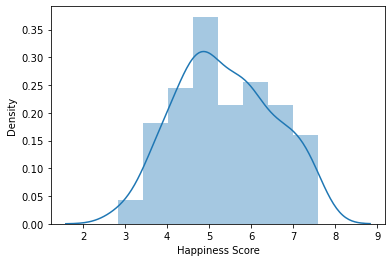

In [6]:
sns.distplot(df['Happiness Score'])

C:\Users\jameel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jameel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jameel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

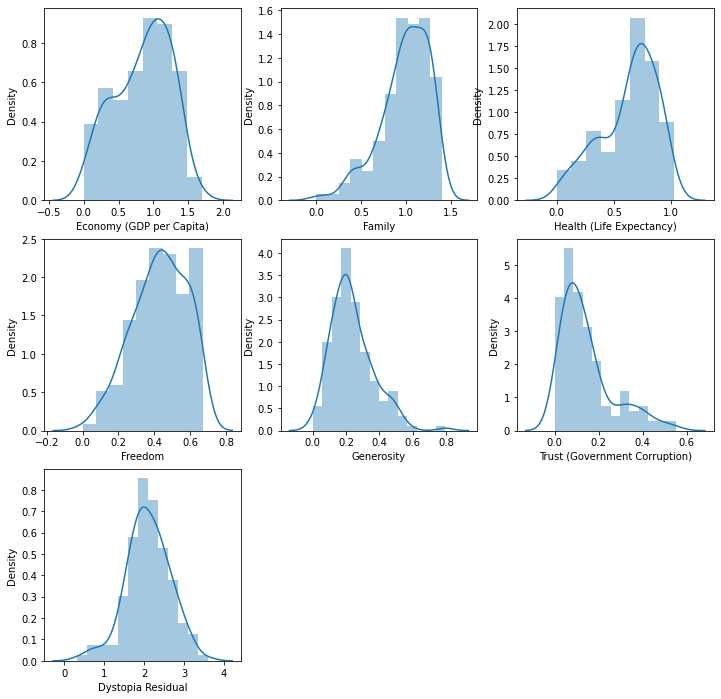

In [7]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
'Freedom', 'Generosity', 'Trust (Government Corruption)',
'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])
        
plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

Inferences :
1) Some of the distributions look like we have at least two distinct groups of countries. For instance the Health data has the majority clustered around 0.7 but also a second group of countries
around 0.3.

2) Some of the distributions look like we have only one group of countries. For instance the
Dystopia Residual has the majority clustered around 2 and the rest are spread out and didn’t form
a cluster anywhere.


# Modeling

#  Linear fitting of the Happiness score in terms of the 6 factors contributing to it

We all know that Happiness Score is calculated from the 6 features and the residual i.e., Economy
(GDP per Capita), family, Health (Life Expectancy), Freedom, Trust (Government Corruption),Generosity and Dystopia Residual. We will explore the linear relation using coefficients obtained
from Linear Regression by splitting into training and testing data set.


In [8]:
Y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [9]:
 print('Coefficients:',lm.coef_)

Coefficients: [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


In [10]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

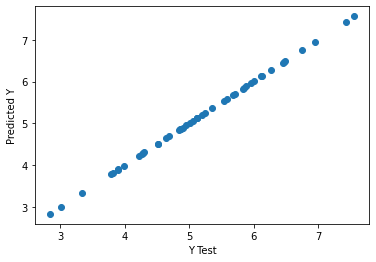

In [11]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 0.00026861910100892117
Mean Squared Error: 9.548227095669277e-08
Root Mean Squared Error: 0.00030900205655738405


In [13]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


Inferences : 

As expected the happiness score is a perfect linear plot of the factors with the coefficients given in
the table above.

# Factors Contributing to Happiness

## Correlation Matrix as a heat map

The following is a heat map describing the correlation matrix (correlation coefficient of the corresponding co-ordinates) in terms of color encoded matrix.

<AxesSubplot:>

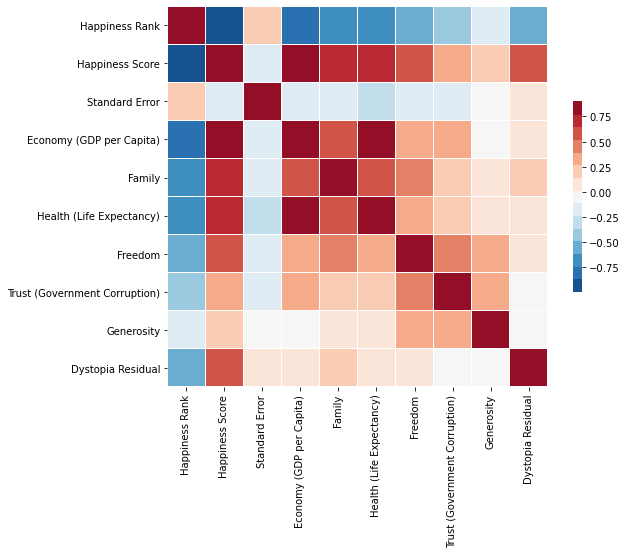

In [14]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(correlation_mat, vmax=.9,cmap=sns.color_palette("RdBu_r", 15),
square=True,linewidths=.5, cbar_kws={"shrink": .5})

## Regional Influence of factors as a heat map

In [15]:
by_region = df.groupby('Region')

<AxesSubplot:ylabel='Region'>

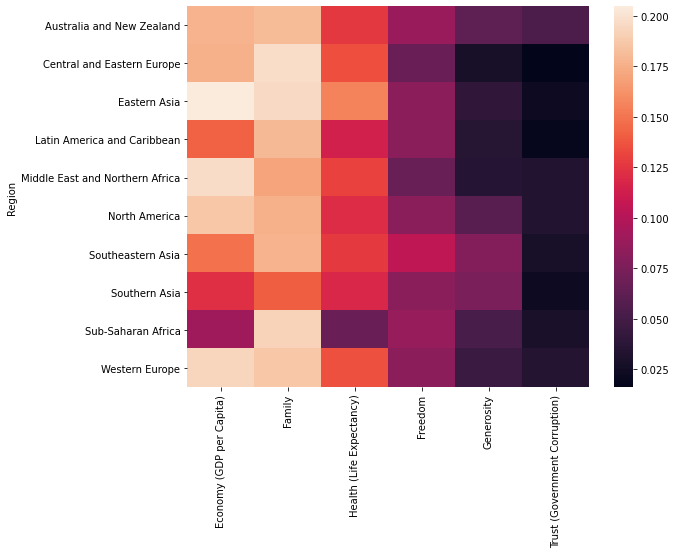

In [16]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))

## Scatter Plot of Happiness Score Vs Factors Corresponding to it

Influence of the 6 factors Economy, Family, etc. on happiness can be visualised as a scatter plot so
as to get how they are correlated.

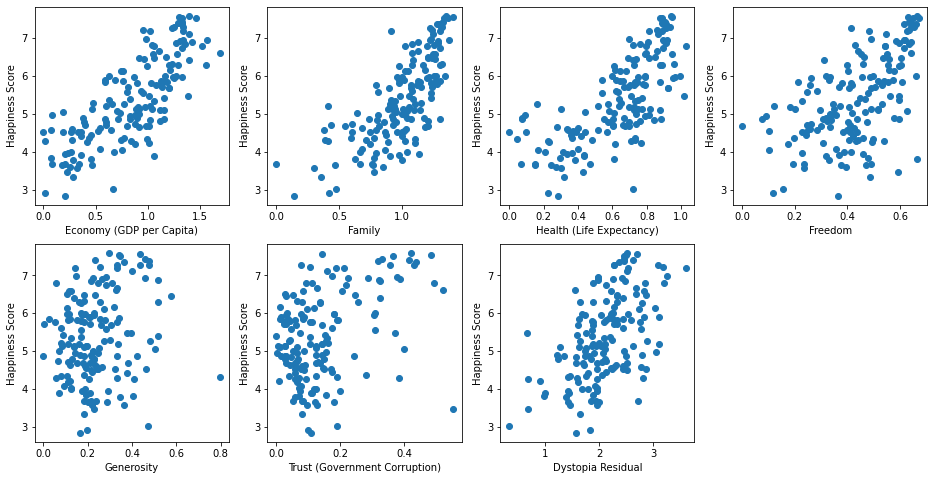

In [17]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                     'Freedom', 'Generosity', 'Trust (Government Corruption)',
                     'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        plt.scatter(data[column],df['Happiness Score'])
        plt.xlabel(column);
        plt.ylabel('Happiness Score');
    

plt.figure(figsize=(16,8))
plot_columns_on_grid(df, happiness_factors, (2, 4))


Inferences :

1)The economy and family are by far the most important contributors to the total happiness score.
Generosity and Trust are the least important factors. Freedom and Life Expectancy are moderate
factors

2) Order of dependency of Happiness Score : Economy >= Family >> Health > Freedom >>
Generosity > Trust.


# Happiness by region


## Tabular representation of Happiness Score Vs Region

The following is a tabular representation of mean happiness factors and happiness score of the
regions across the globe.

In [18]:
by_region[['Happiness Score'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.455315,0.392795,2.265355
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.429580,0.244235,2.480935
Western Europe,6.689619,1.298596,1.247302,0.909148,0.549926,0.302109,0.231463,2.151185
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.217788,0.117172,2.622577
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.225885,0.127695,1.681607
Middle East and Northern Africa,5.406900,1.066973,0.920490,0.705616,0.361751,0.190375,0.181702,1.980009
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.152264,0.086674,2.021400
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.419261,0.151276,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.341429,0.102536,2.016769


## Strip plot of Happiness Rank Vs Region

The following is a strip plot with the regions on X-axis and their happiness score jittered on the
Y-axis. It can be used to get an estimate of happiness scores in the regions

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

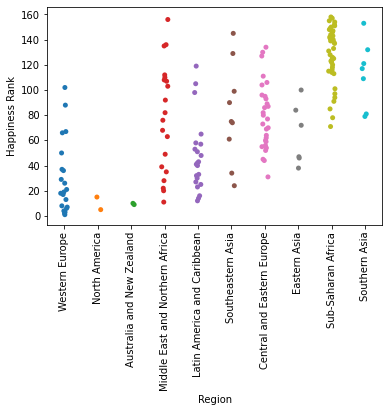

In [19]:
g = sns.stripplot(x = "Region", y = "Happiness Rank", data = df, jitter = True)
plt.xticks(rotation = 90)

## Box Plot of Happiness Rank of Europe Vs Non Europe


The following is a box plot to compare Happiness Score ranges and distribution of European Vs
Non European countries and can be extended to other continents as well.

In [20]:
europe=['Switzerland','Iceland','Denmark','Norway','Finland','Netherlands',
        'Sweden','Austria','Luxembourg','Ireland','Belgium','United Kingdom','Germany',
        'France','Czech Republic','Spain','Malta','Slovakia','Italy','Moldova','Slovenia',
        'Lithuania','Belarus','Poland','Croatia','Russia','North Cyprus','Cyprus','Kosovo',
        'Turkey','Montenegro','Romania','Serbia','Portugal','Latvia','Macedonia','Albania',
        'Bosnia and Herzegovina','Greece','Hungary','Ukraine','Bulgaria']


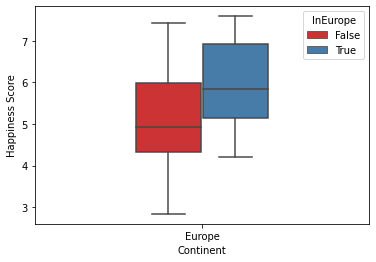

In [21]:
df['InEurope']=(df['Country'].isin(europe))
df['Continent']= 'Europe'
sns.boxplot(x='Continent',y='Happiness Score',hue='InEurope',width = 0.4,
            data=pd.concat([df[['Continent','Happiness Score','InEurope']]]),palette='Set1');

Inferences :

1) Australia and New Zealand is the region with the most happy people, closely followed by
North America.

2) The least happy people are living in Sub-Saharan Africa followed by Southern & Southeastern Asia

# Clustering Analysis

## Using K-mean clustering

In the original data, the happiness factors such as Economy, Family, etc. sum up to the happiness
Score. Consequently, a country with high happiness score also tend to have high factors. To
analyze how the influence of economy on happiness varies between countries, we first normalize
the factors using the total happiness score.

In [22]:
df_norm = df
df_norm[happiness_factors] = df_norm[happiness_factors].div(df['Happiness Score'].values, axis=0)

In [23]:
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(df_norm[happiness_factors[:-1]])

## Plotting distributions of the factors for each cluster:

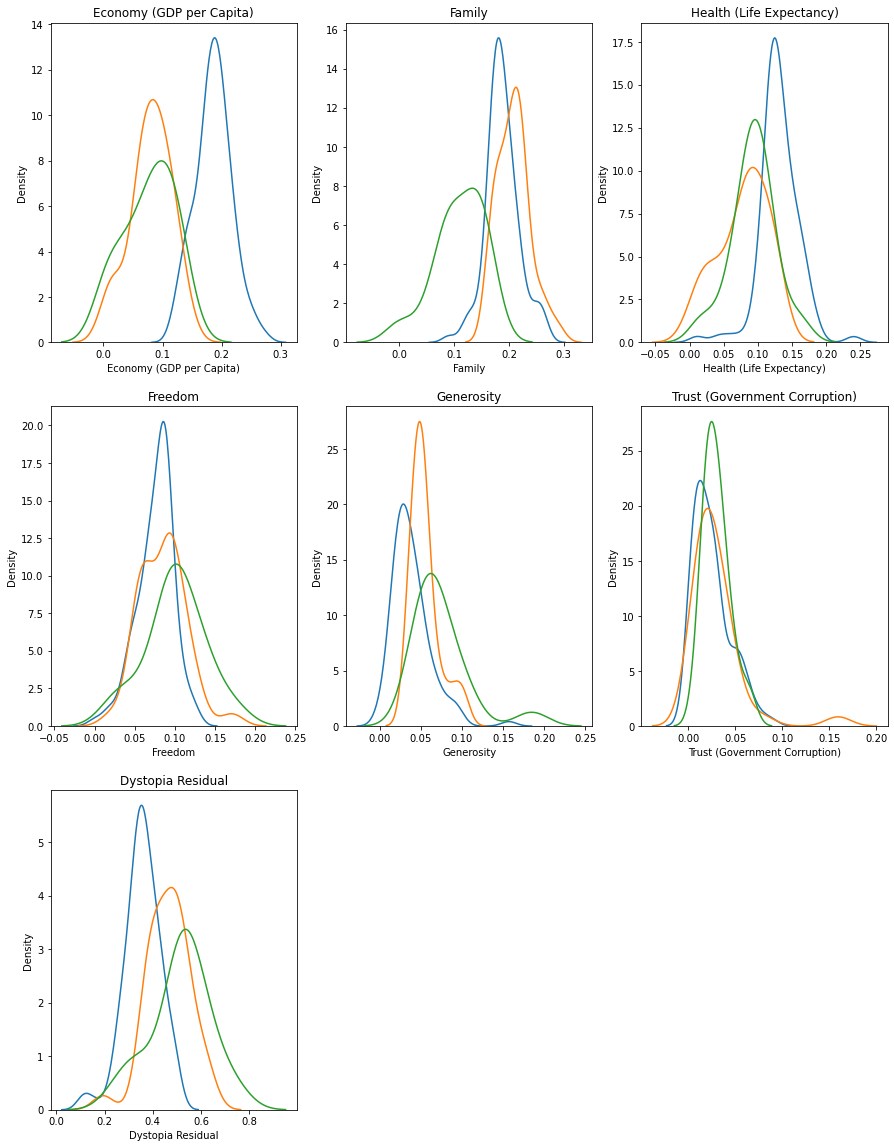

In [24]:
plt.figure(figsize=(15,20))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(df_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)

## Comparing the happiness score distribution for the clusters:


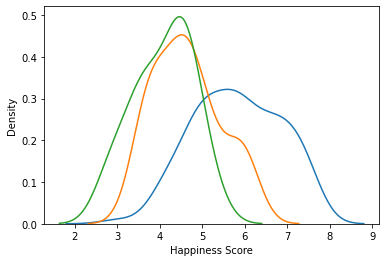

In [25]:
for cluster in range(cluster_n):
    sns.kdeplot(df.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)

Inferences :

1) There is a big difference between the happiness score distributions of the clusters

2) It can be plotted on globe to get more information about the clusters .